In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.inspection import permutation_importance

sns.set_style('whitegrid')

In [2]:
BEST_MODEL_NAME = "Logistic_Regression"

model_path = f"../models/best_model_{BEST_MODEL_NAME}.joblib"
best_model = joblib.load(model_path)
print(f"Loaded model from {model_path}")

Loaded model from ../models/best_model_Logistic_Regression.joblib


In [3]:
X_train_scaled = np.load("../data/processed/X_train_scaled.npy")
X_test_scaled = np.load("../data/processed/X_test_scaled.npy")
y_test = np.load("../data/processed/y_test.npy")

df = pd.read_csv("../data/wdbc.data", header=None)
feature_names = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
    'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
    'fractal_dimension_worst'
]

Calculating permutation importance on test set... (this may take ~30–60 seconds)


C:\Users\matth\AppData\Local\Temp\ipykernel_29644\3783987895.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


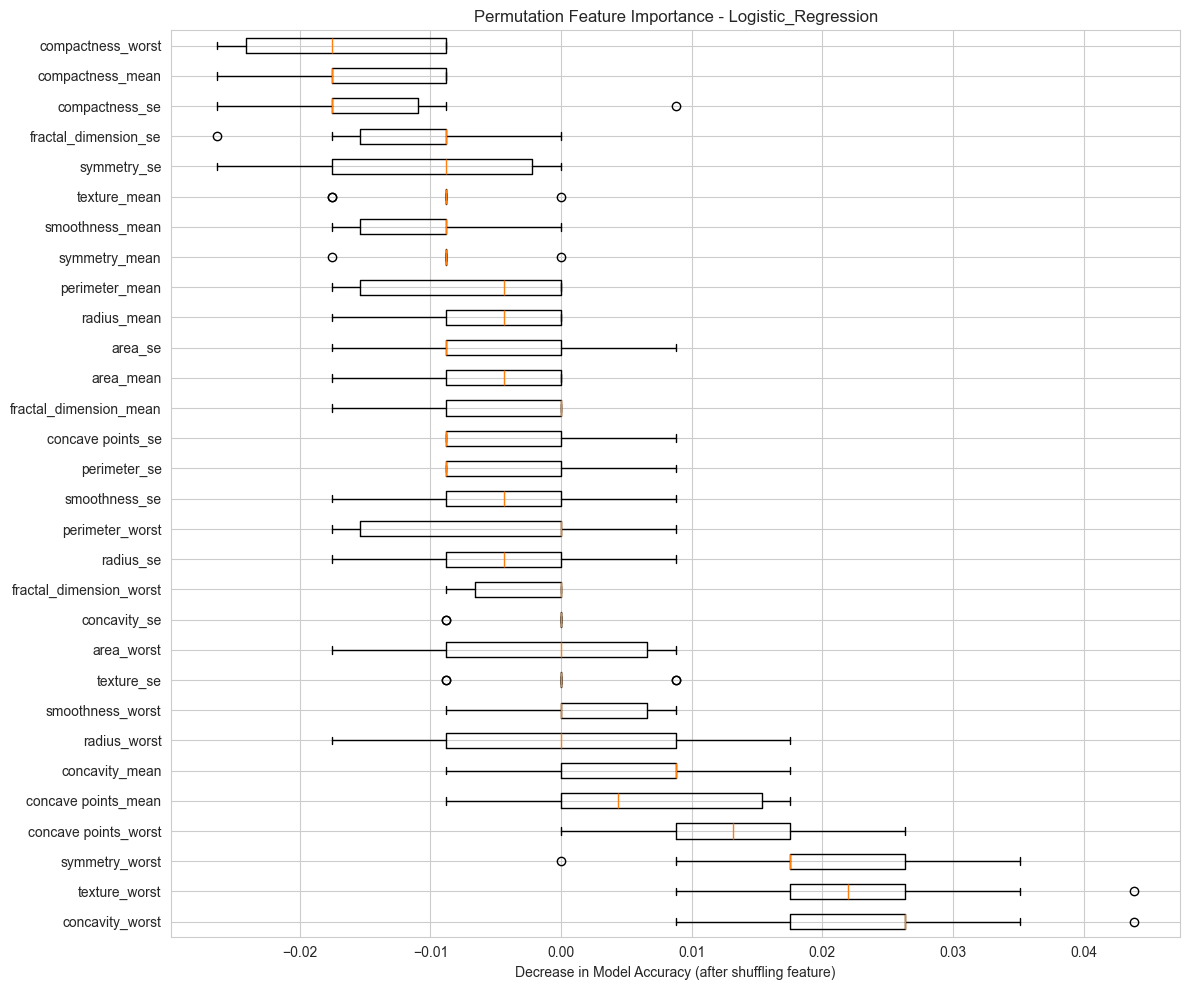

Top 10 Features by Permutation Importance:
                Feature  Mean Importance       Std
0       concavity_worst         0.024561  0.009448
1         texture_worst         0.022807  0.010526
2        symmetry_worst         0.020175  0.010416
3  concave points_worst         0.012281  0.008040
4   concave points_mean         0.005263  0.009768
5        concavity_mean         0.005263  0.007018
6          radius_worst         0.000877  0.011404
7      smoothness_worst         0.000877  0.006140
8            texture_se         0.000000  0.005548
9            area_worst        -0.001754  0.008595


In [4]:
print("Calculating permutation importance on test set... (this may take ~30–60 seconds)")

perm_importance = permutation_importance(
    best_model, 
    X_test_scaled, 
    y_test,
    n_repeats=10,          
    random_state=42,
    n_jobs=-1
)

# Sort by mean importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

plt.figure(figsize=(12, 10))
plt.title(f"Permutation Feature Importance - {BEST_MODEL_NAME}")
plt.boxplot(
    perm_importance.importances[sorted_idx].T,
    vert=False,
    labels=[feature_names[i] for i in sorted_idx]
)
plt.xlabel("Decrease in Model Accuracy (after shuffling feature)")
plt.tight_layout()
plt.show()

# Top 10 table
top_features = pd.DataFrame({
    'Feature': [feature_names[i] for i in sorted_idx[:10]],
    'Mean Importance': perm_importance.importances_mean[sorted_idx[:10]],
    'Std': perm_importance.importances_std[sorted_idx[:10]]
})
print("Top 10 Features by Permutation Importance:")
print(top_features)